In [4]:
import numpy as np
import matplotlib.pyplot as plt     #importing e v e r y t h i n g
import seaborn as sns
sns.set(color_codes=True)
import csv
import math
import pandas as pd
import sklearn.metrics as met
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from copy import deepcopy
import re

In [5]:
# i tried reading the csv in a bad way

In [6]:
df = pd.read_csv('../data/blogtext.csv')  #read it in a good way
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [7]:
df.shape

(681284, 7)

In [8]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

<AxesSubplot:>

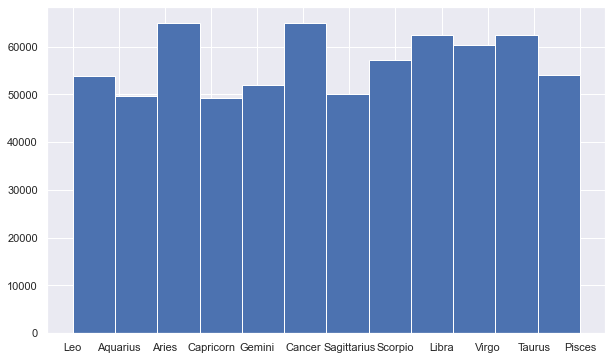

In [9]:
df['sign'].hist(bins=12,figsize=(10,6))

In [10]:
#cleaning up the data
df.drop(['id','gender','age','topic','date'], axis=1, inplace=True)

In [30]:
df.head(3240)

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Leo,testing!!! testing!!!,testing testing
4,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
...,...,...,...
3235,Aries,"Ben, my friend, you have too much t...",ben my friend you have too much time on your h...
3236,Aries,CDs make urlLink bad gifts for ki...,cds make urllink bad gifts for kids
3237,Aries,urlLink Aggregate mood of Livejour...,urllink aggregate mood of livejournal users ov...
3238,Aries,New Zealand director Andrew Adamson...,new zealand director andrew adamson the man be...


In [12]:
df['clean_text']=df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))  #take out unwanted characters

In [13]:
df['clean_text']=df['clean_text'].apply(lambda x: x.lower())  #lowercase everything

In [14]:
df['clean_text']=df['clean_text'].apply(lambda x: x.strip())  #remove extra spaces

In [15]:
# CULLLING THE DATA

df2 = pd.read_csv('../data/blogtext.csv')  #read it in a good way
df2.drop(['id','gender','age','topic','date'], axis=1, inplace=True)
df2.head()

,sign,text
0,Leo,"Info has been found (+/- 100 pages,..."
1,Leo,These are the team members: Drewe...
2,Leo,In het kader van kernfusie op aarde...
3,Leo,testing!!! testing!!!
4,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [17]:
df2['clean_text']=df2['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))  #take out unwanted characters

In [18]:
df2['clean_text']=df2['clean_text'].apply(lambda x: x.lower())  #lowercase everything

In [19]:
df2['clean_text']=df2['clean_text'].apply(lambda x: x.strip())  #remove extra spaces

In [20]:
df2.shape

(681284, 3)

In [31]:
count = 0

for post in df2['clean_text']:
    if len(post.split()) <= 10:
         df2 = df2.drop(count)
    count += 1

In [32]:
POSTS_PER_SIGN = 20000
zods = ['Leo','Aquarius','Aries','Capricorn','Gemini','Cancer','Sagittarius','Scorpio','Libra','Virgo','Taurus','Pisces']

In [33]:
post_counts = dict()
for zodiac in zods:
    post_counts[zodiac] = 0
word_counts = dict()
count = 0

DF =  df2.reset_index(drop=True)

for post in DF['clean_text']:
    sign = DF['sign'][count]
    if post_counts[sign] < POSTS_PER_SIGN:
        for word in post.split():
            cur = sign + '-' + word
            if cur in word_counts:
                word_counts[cur] += 1
            else:
                word_counts[cur] = 1
        post_counts[sign] += 1
    count += 1

In [34]:
df2.head()

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
4,Aquarius,I had an interesting conversation...,i had an interesting conversation with my dad ...


In [40]:
post_counts

{'Leo': 20000,
 'Aquarius': 20000,
 'Aries': 20000,
 'Capricorn': 20000,
 'Gemini': 20000,
 'Cancer': 20000,
 'Sagittarius': 20000,
 'Scorpio': 20000,
 'Libra': 20000,
 'Virgo': 20000,
 'Taurus': 20000,
 'Pisces': 20000}

In [36]:
df2.head(705)

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
4,Aquarius,I had an interesting conversation...,i had an interesting conversation with my dad ...
...,...,...,...
700,Libra,31. Because he leaves his fri...,because he leaves his friends on the phone for...
701,Libra,And thank All the vieterems o...,and thank all the vieterems of the civil war c...
702,Libra,I was on my way to my cousin'...,i was on my way to my cousin s house who lives...
703,Libra,47 hours uninvestigates: ...,hours uninvestigates bio hours uninvestigates ...


In [38]:
df2.head(718)

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
4,Aquarius,I had an interesting conversation...,i had an interesting conversation with my dad ...
...,...,...,...
713,Scorpio,Just read this that someone posted on t...,just read this that someone posted on the os i...
714,Scorpio,I can't believe the weekend is nearly o...,i can t believe the weekend is nearly over i h...
715,Scorpio,Driving to work I saw this Sky TV van p...,driving to work i saw this sky tv van parked a...
716,Scorpio,Ooh I can't wait till tomorrow is over ...,ooh i can t wait till tomorrow is over and the...


<AxesSubplot:>

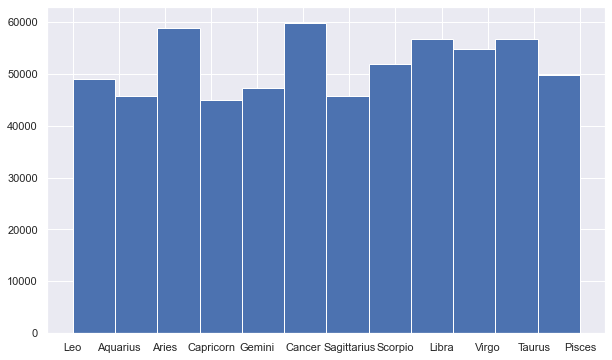

In [39]:
df2['sign'].hist(bins=12,figsize=(10,6))

In [28]:
df2.head(705)

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
4,Aquarius,I had an interesting conversation...,i had an interesting conversation with my dad ...
...,...,...,...
700,Libra,31. Because he leaves his fri...,because he leaves his friends on the phone for...
701,Libra,And thank All the vieterems o...,and thank all the vieterems of the civil war c...
702,Libra,I was on my way to my cousin'...,i was on my way to my cousin s house who lives...
703,Libra,47 hours uninvestigates: ...,hours uninvestigates bio hours uninvestigates ...


In [43]:
DF.to_csv(path_or_buf='../data/blogtext_trimmed.csv',index_label=False)

In [44]:
df3 = DF.drop(['text'], axis=1)

In [42]:
df2.head(966)

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
4,Aquarius,I had an interesting conversation...,i had an interesting conversation with my dad ...
...,...,...,...
961,Taurus,This is my first entry. I have long wanted ...,this is my first entry i have long wanted to a...
962,Taurus,My son and I are visiting Mom and Dad. I ha...,my son and i are visiting mom and dad i have n...
963,Cancer,Its not the laughter. Its ...,its not the laughter its not just the fun you ...
965,Cancer,"What a wonderful, wonderful w...",what a wonderful wonderful world this could be...


In [45]:
df4 = DF.drop(['clean_text'],axis=1)

In [46]:
df3.to_csv(path_or_buf='../data/blogtext_trimmed_clean.csv',index_label=False)

In [47]:
df4.to_csv(path_or_buf='../data/blogtext_trimmed_raw.csv',index_label=False)

In [230]:
df2.head(705)

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
4,Aquarius,I had an interesting conversation...,i had an interesting conversation with my dad ...
...,...,...,...
700,Libra,31. Because he leaves his fri...,because he leaves his friends on the phone for...
701,Libra,And thank All the vieterems o...,and thank all the vieterems of the civil war c...
702,Libra,I was on my way to my cousin'...,i was on my way to my cousin s house who lives...
703,Libra,,


In [231]:
len(NaN)

NameError: name 'NaN' is not defined

In [234]:
len(df2['clean_text'][703].split())

0

In [236]:
df5 = df2.drop(703)
df5.head(705)

,sign,text,clean_text
0,Leo,"Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,Leo,These are the team members: Drewe...,these are the team members drewes van der laag...
2,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...
4,Aquarius,I had an interesting conversation...,i had an interesting conversation with my dad ...
...,...,...,...
700,Libra,31. Because he leaves his fri...,because he leaves his friends on the phone for...
701,Libra,And thank All the vieterems o...,and thank all the vieterems of the civil war c...
702,Libra,I was on my way to my cousin'...,i was on my way to my cousin s house who lives...
704,Libra,47 hours uninvestigates: ...,hours uninvestigates bio hours uninvestigates ...
